In [1]:
from gurobipy import *
import math
import networkx as nx
import matplotlib.pyplot as plt
import random
import pandas as pd
import re
import io
from random import randrange

We create the graph with its nodes, edges, and attributes

In [2]:
graph=nx.Graph()

This are the node locations for the selected topology:
[(0, 'N1'), (1, 'N2'), (2, 'N3'), (3, 'N4'), (4, 'N5'), (5, 'N6'), (6, 'N7'), (7, 'N8'), (8, 'N9'), (9, 'N10'), (10, 'N11'), (11, 'N12'), (12, 'N13'), (13, 'N14'), (14, 'N15')]
\
This are the existing links for the selected topology:
[(0, 7, None), (0, 6, None), (0, 5, None), (1, 2, None), (1, 4, None), (1, 5, None), (2, 7, None), (2, 4, None), (3, 5, None), (3, 4, None), (5, 12, None), (6, 9, None), (6, 13, None), (7, 8, None), (7, 14, None), (8, 14, None), (8, 9, None), (8, 11, None), (9, 11, None), (10, 13, None), (10, 12, None), (12, 13, None)]
22
[10, 13, 2, 9, 6]
Nodes selected arbitrarily to work as DCN
2 N3
6 N7
9 N10
10 N11
13 N14
[(0, 0), (1, 0), (2, 1), (3, 0), (4, 0), (5, 0), (6, 1), (7, 0), (8, 0), (9, 1), (10, 1), (11, 0), (12, 0), (13, 1), (14, 0)]


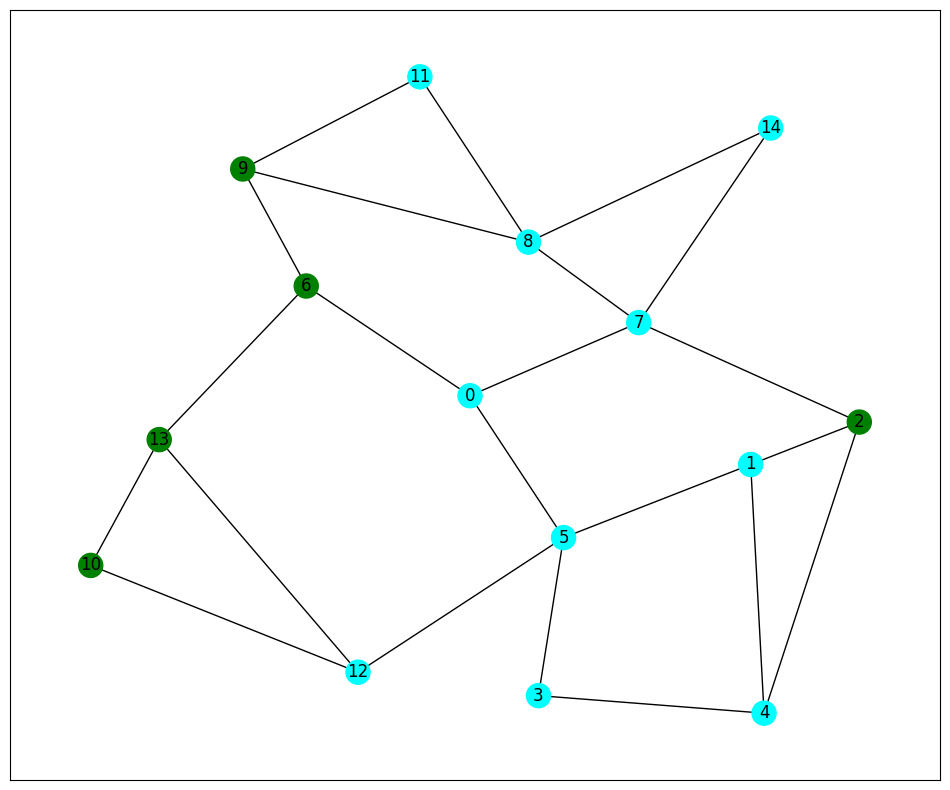

In [3]:
#to select US-Canada graph, write './us-ca.gml', for EU graph './eu.gml', and for Atlanta graph './atlanta.gml'
# V=nx.read_gml('./us-ca.gml',destringizer=int)
V = nx.read_gml('./atlanta.gml', destringizer=int)
N=5
print('This are the node locations for the selected topology:')
print(V.nodes(data='name'))
print('\\')
print('This are the existing links for the selected topology:')
print(V.edges(data='name'))
node_positions = {}
print(V.number_of_edges())
for node, attributes in V.nodes(data=True):
    
    graphics = attributes.get('graphics', {})
    x = graphics.get('x', 0)
    y = graphics.get('y', 0)
    
    node_positions[node] = (x, y)

DCN_sel=[]
i=0
while i<N:
    tmp=randrange(V.number_of_nodes())
    if tmp not in DCN_sel:
        DCN_sel.append(tmp)
        i=i+1
print(DCN_sel)
#DCN_sel=[4,9,12,13,24]

for i in V.nodes():
    if i in DCN_sel:
        V.nodes[i]['S']=1
        
    else:
        V.nodes[i]['S']=0
print("Nodes selected arbitrarily to work as DCN")
for i in V.nodes():
    if V.nodes[i]['S']==1:
        print(i,V.nodes[i]["name"])
print(V.nodes(data='S'))
color_map2 = []
for i in V.nodes():
    if V.nodes[i]['S']==1:
        color_map2.append('green')
    else:
        color_map2.append('cyan')
plt.figure(figsize=(12, 10))
nx.draw_networkx(V, with_labels=True,node_color=color_map2, pos=node_positions)

In [4]:
nw_mod=Model(name="nw")


C=100
c=10


delta_ij = nw_mod.addVars(V.number_of_nodes(),V.number_of_nodes(),name='delta_{i}_{j}',vtype=GRB.BINARY)
x=nw_mod.addVars(V.number_of_nodes(),name='x',vtype=GRB.BINARY)
y=nw_mod.addVars(V.number_of_nodes(),name='y',vtype=GRB.BINARY)
z=nw_mod.addVars(V.number_of_nodes(),name='z',vtype=GRB.BINARY)

obj_fun=sum(c*delta_ij[i,j] for i,j in V.edges())
nw_mod.setObjective(obj_fun, GRB.MINIMIZE)

for i in V.nodes():
    nw_mod.addConstr(x[i] + y[i] + z[i] == 1, 'constraint_one_subd{i}')
    
#nw_mod.addConstr(sum(V.nodes[i]['S'] * x[i] for i in V.nodes()) <= (math.floor(N/2)) - 1, 'constraint_sum_S_x')
#nw_mod.addConstr(sum(V.nodes[i]['S'] * y[i] for i in V.nodes()) <= (math.floor(N/2)) - 1, 'constraint_sum_S_y')
#nw_mod.addConstr(sum(V.nodes[i]['S'] * z[i] for i in V.nodes()) <= (math.floor(N/2)) - 1, 'constraint_sum_S_z')

nw_mod.addConstr(sum(V.nodes[i]['S'] * x[i] for i in V.nodes()) <= (math.ceil(N/2)) - 1, 'constraint_sum_S_x')
nw_mod.addConstr(sum(V.nodes[i]['S'] * y[i] for i in V.nodes()) <= (math.ceil(N/2)) - 1, 'constraint_sum_S_y')
nw_mod.addConstr(sum(V.nodes[i]['S'] * z[i] for i in V.nodes()) <= (math.ceil(N/2)) - 1, 'constraint_sum_S_z')

#nw_mod.addConstr(sum(x[i] for i in V.nodes())>=sum(y[i] for i in V.nodes()),'constraint_max_x')
#nw_mod.addConstr(sum(y[i] for i in V.nodes())>=sum(z[i] for i in V.nodes()),'constraint_max_y')

#nw_mod.addConstr(sum(x[i] for i in V.nodes())>=sum(y[i] for i in V.nodes())+sum(z[i] for i in V.nodes()),'constraint_max_x')

#nw_mod.addConstr(sum(int(V.nodes[i]['S']) * x[i] for i in V.nodes()) <= (math.floor(N/2)) - 1, 'constraint_sum_S_x')
#nw_mod.addConstr(sum(int(V.nodes[i]['S']) * y[i] for i in V.nodes()) <= (math.floor(N/2)) - 1, 'constraint_sum_S_y')
#nw_mod.addConstr(sum(int(V.nodes[i]['S']) * z[i] for i in V.nodes()) <= (math.floor(N/2)) - 1, 'constraint_sum_S_z')


Set parameter Username
Academic license - for non-commercial use only - expires 2025-10-14


<gurobi.Constr *Awaiting Model Update*>

In [5]:
'''for i in V.nodes():
    for j in V.nodes():
        if V.has_edge(i,j)
                nw_mod.addConstr(delta_ij[i,j] <= 2 - x[i] - x[j], 'constraint_delta_ij_x_{i}_{j}_same_x ') 
                nw_mod.addConstr(delta_ij[i,j] <= 2 - y[i] - y[j], 'constraint_delta_ij_x_{i}_{j}_same_y ')
                nw_mod.addConstr(delta_ij[i,j] <= 2 - x[i] - z[j], 'constraint_delta_ij_x_{i}_{j}_same_z ')
                nw_mod.addConstr(delta_ij[i,j] >= x[i] - x[j], 'constraint_delta_ij_x_{i}_{j}_not_same_x ')
                nw_mod.addConstr(delta_ij[i,j] >= y[i] - y[j], 'constraint_delta_ij_x_{i}_{j}_not_same_y ')
                nw_mod.addConstr(delta_ij[i,j] >= z[i] - z[j], 'constraint_delta_ij_x_{i}_{j}_not_same_z ')
'''
for i, j in V.edges():
    nw_mod.addConstr(delta_ij[i, j] <= 2 - x[i] - x[j], f'constraint_delta_ij_x_{i}_{j}_same_x')
    nw_mod.addConstr(delta_ij[j, i] <= 2 - x[i] - x[j], f'constraint_delta_ij_x_{i}_{j}_same_x_2')
    nw_mod.addConstr(delta_ij[i, j] <= 2 - y[i] - y[j], f'constraint_delta_ij_x_{i}_{j}_same_y')
    nw_mod.addConstr(delta_ij[j, i] <= 2 - y[i] - y[j], f'constraint_delta_ij_x_{i}_{j}_same_y_2')
    nw_mod.addConstr(delta_ij[i, j] <= 2 - z[i] - z[j], f'constraint_delta_ij_x_{i}_{j}_same_z')
    nw_mod.addConstr(delta_ij[j, i] <= 2 - z[i] - z[j], f'constraint_delta_ij_x_{i}_{j}_same_z_2')
    nw_mod.addConstr(delta_ij[i, j] >= x[i] - x[j], f'constraint_delta_ij_x_{i}_{j}_not_same_x')
    nw_mod.addConstr(delta_ij[j, i] >= x[i] - x[j], f'constraint_delta_ij_x_{i}_{j}_not_same_x_2')
    nw_mod.addConstr(delta_ij[i, j] >= y[i] - y[j], f'constraint_delta_ij_x_{i}_{j}_not_same_y')
    nw_mod.addConstr(delta_ij[j, i] >= y[i] - y[j], f'constraint_delta_ij_x_{i}_{j}_not_same_y_2')
    nw_mod.addConstr(delta_ij[i, j] >= z[i] - z[j], f'constraint_delta_ij_x_{i}_{j}_not_same_z')
    nw_mod.addConstr(delta_ij[j, i] >= z[i] - z[j], f'constraint_delta_ij_x_{i}_{j}_not_same_z_2')


In [6]:



#nw_mod.setParam('OutputFlag',False)
nw_mod.optimize()
#nw_mod.computeIIS()
print('Optimization is done. Objective function value: %.2f' % nw_mod.objVal)
deltas={}
x_arr={}
y_arr={}
z_arr={}

for v in nw_mod.getVars():
    if re.match('delta',v.varName) is not None and v.x!=0:
        deltas[v.varName]=v.x
    if re.match('x',v.varName) is not None:
        x_arr[v.varName]=v.x
    if re.match('y',v.varName) is not None:
        y_arr[v.varName]=v.x
    if re.match('z',v.varName) is not None:
        z_arr[v.varName]=v.x
dist=[]
dist.append(x_arr)
dist.append(y_arr)
dist.append(z_arr)

dfdelta=pd.DataFrame.from_dict(deltas,orient='index')
#print(dfdist)
print("List of links cut:")
print(dfdelta)

tmpx=[]
tmpy=[]
tmpz=[]
for i in x_arr:
    
    if x_arr[i]==1:
        tmpx.append(list(x_arr).index(i))
print("Nodes in partition x:")
print(tmpx)
print ("DCN nodes in this partition")
for i in V.nodes():
    if  V.nodes[i]['S']==1:
        if i in tmpx:
            print(i)
            print(V.nodes[i]['name'])
for i in y_arr:
    
    if y_arr[i]==1:
        tmpy.append(list(y_arr).index(i))
print("Nodes in partition y:")
print(tmpy)
print ("DCN nodes in this partition")
for i in V.nodes():
    if  V.nodes[i]['S']==1:
        if i in tmpy:
            print(i)
            print(V.nodes[i]['name'])
for i in z_arr:
    
    if z_arr[i]==1:
        tmpz.append(list(z_arr).index(i))
print("Nodes in partition z:")
print(tmpz)
print ("DCN nodes in this partition")
for i in V.nodes():
    if  V.nodes[i]['S']==1:
        if i in tmpz:
            print(i)
            print(V.nodes[i]['name'])


Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 23.6.0 23H124)

CPU model: Apple M1 Pro
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 282 rows, 270 columns and 852 nonzeros
Model fingerprint: 0x1fc45577
Variable types: 0 continuous, 270 integer (270 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Found heuristic solution: objective 60.0000000
Presolve removed 0 rows and 181 columns
Presolve time: 0.00s
Presolved: 282 rows, 89 columns, 852 nonzeros
Variable types: 0 continuous, 89 integer (89 binary)

Root relaxation: objective 0.000000e+00, 50 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   45   60.00000    0.00000   10

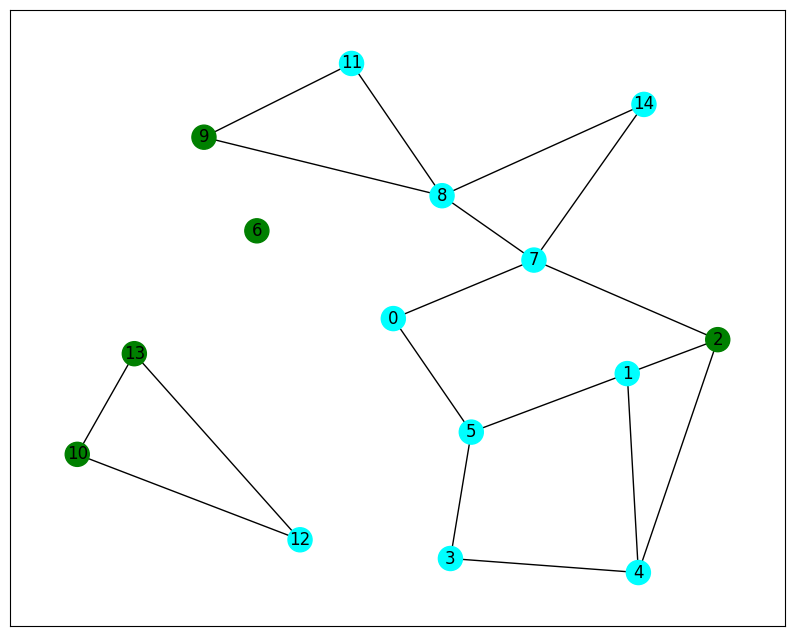

In [7]:
edges_to_remove = []
for i, j in V.edges():

    if delta_ij[i, j].X == 1:
        
        edges_to_remove.append((i, j))

for edge in edges_to_remove:
    V.remove_edge(*edge)
plt.figure(figsize=(10, 8))
nx.draw_networkx(V, with_labels=True,node_color=color_map2, pos=node_positions)
